In [1]:
# Importing Labraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py 
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Data

In [5]:
df=pd.read_excel("C:\AMRUTA-PROJECT\cause _of _death.xlsm")
df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [6]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [7]:
df.tail()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139
6119,Zimbabwe,ZWE,2019,1450,812,232,2884,2068,827,1434,...,3460,2292,405,2855,2554,2891,2065,4437,662,136


In [9]:
print("\033[1m" + 'Number of rows in the given dataset:' + "\033[0m")
print(df.shape[0])

print("\033[1m" + 'Number of columns in the given dataset:'  + "\033[0m")
df.shape[1]

Number of rows in the given dataset:
6120
Number of columns in the given dataset:


34

In [10]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [11]:
# Checking the missing values
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [12]:
df['Year'].nunique()

30

In [13]:
df['Country/Territory'].value_counts()

Afghanistan         30
Papua New Guinea    30
Niue                30
North Korea         30
North Macedonia     30
                    ..
Greenland           30
Grenada             30
Guam                30
Guatemala           30
Zimbabwe            30
Name: Country/Territory, Length: 204, dtype: int64

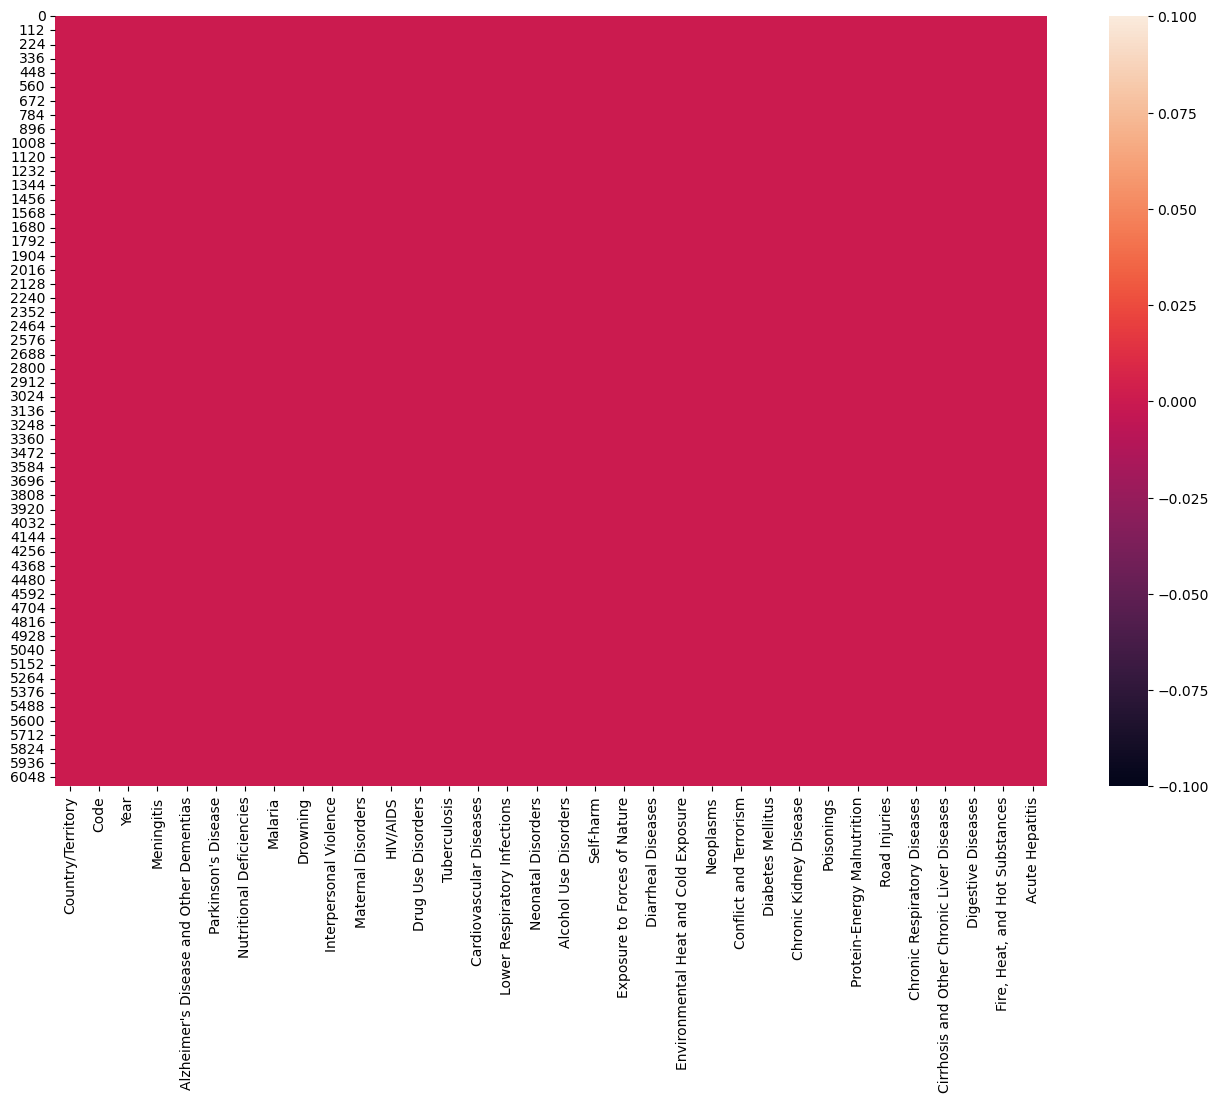

In [15]:
# Checking for Missing Values
sns.set_palette('coolwarm_r')
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull())
plt.show()

In [17]:
# Sepearating causes of death 

X = df.drop(columns = ['Country/Territory', 'Code', 'Year'],axis=1)

In [18]:
# Adding a new column Total_no_of_deaths

df['Total_no_of_deaths'] = X.sum(axis=1)

In [20]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_no_of_deaths
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795


In [66]:
df1.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [67]:
df1.describe().T.sort_values('max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Cardiovascular Diseases,6120.0,73160.454575,291577.537794,4.0,2028.00,11742.0,42546.50,4584273.0
Neoplasms,6120.0,37542.244771,161558.365445,1.0,809.75,5629.5,20147.75,2716551.0
Chronic Respiratory Diseases,6120.0,17092.374837,105157.179839,1.0,289.00,1689.0,5249.75,1366039.0
Diarrheal Diseases,6120.0,10822.795425,65416.174485,0.0,20.00,296.5,3946.75,1119477.0
Neonatal Disorders,6120.0,12558.942647,56058.366412,0.0,131.00,916.0,7419.75,852761.0
Lower Respiratory Infections,6120.0,13687.914706,48031.720009,0.0,345.00,2126.5,10161.25,690913.0
Tuberculosis,6120.0,7491.928595,39549.977578,0.0,35.00,417.0,2924.25,657515.0
Conflict and Terrorism,6120.0,538.243954,7033.308187,0.0,0.00,0.0,23.00,503532.0
Digestive Diseases,6120.0,10725.267157,37228.051096,0.0,284.00,2185.0,6080.00,464914.0
Road Injuries,6120.0,5930.795588,24097.784291,0.0,174.75,966.5,3435.25,329237.0


In [68]:
dfcor=df.corr()
dfcor

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_no_of_deaths
Year,1.000000,-0.043288,0.083710,0.068756,-0.078266,-0.015964,-0.040910,-0.001122,-0.027460,0.022964,...,0.074970,-0.007414,-0.088377,0.005982,0.008645,0.031126,0.025539,-0.014134,-0.032604,0.015163
Meningitis,-0.043288,1.000000,0.216713,0.351668,0.760851,0.755261,0.576347,0.447242,0.899507,0.411881,...,0.562013,0.381899,0.738272,0.511316,0.516440,0.665212,0.684047,0.724751,0.813554,0.641319
Alzheimer's Disease and Other Dementias,0.083710,0.216713,1.000000,0.950785,0.193209,0.031290,0.599403,0.429622,0.200315,0.101628,...,0.814841,0.719373,0.185030,0.760421,0.728337,0.686722,0.703813,0.551121,0.263559,0.783616
Parkinson's Disease,0.068756,0.351668,0.950785,1.000000,0.313033,0.084109,0.753663,0.485528,0.356394,0.145521,...,0.911376,0.818444,0.295749,0.897982,0.882246,0.825476,0.839807,0.699626,0.438842,0.910980
Nutritional Deficiencies,-0.078266,0.760851,0.193209,0.313033,1.000000,0.411149,0.596367,0.407065,0.881740,0.241247,...,0.504551,0.298918,0.991700,0.465285,0.472233,0.586889,0.626332,0.665677,0.820830,0.582968
Malaria,-0.015964,0.755261,0.031290,0.084109,0.411149,1.000000,0.195839,0.184469,0.523581,0.424471,...,0.198686,0.169424,0.416539,0.178822,0.146132,0.271206,0.282995,0.335181,0.362693,0.277914
Drowning,-0.040910,0.576347,0.599403,0.753663,0.596367,0.195839,1.000000,0.539339,0.623558,0.171108,...,0.781125,0.790391,0.579360,0.894074,0.936633,0.846058,0.869528,0.823063,0.711640,0.901813
Interpersonal Violence,-0.001122,0.447242,0.429622,0.485528,0.407065,0.184469,0.539339,1.000000,0.449551,0.315642,...,0.589217,0.471659,0.396216,0.574467,0.494280,0.606565,0.629069,0.679620,0.453349,0.604067
Maternal Disorders,-0.027460,0.899507,0.200315,0.356394,0.881740,0.523581,0.623558,0.449551,1.000000,0.336267,...,0.611581,0.303751,0.838607,0.533423,0.548051,0.713392,0.741447,0.788030,0.956576,0.664417
HIV/AIDS,0.022964,0.411881,0.101628,0.145521,0.241247,0.424471,0.171108,0.315642,0.336267,1.000000,...,0.245579,0.165169,0.252876,0.229103,0.181262,0.270776,0.273079,0.324672,0.269876,0.273981


<AxesSubplot:>

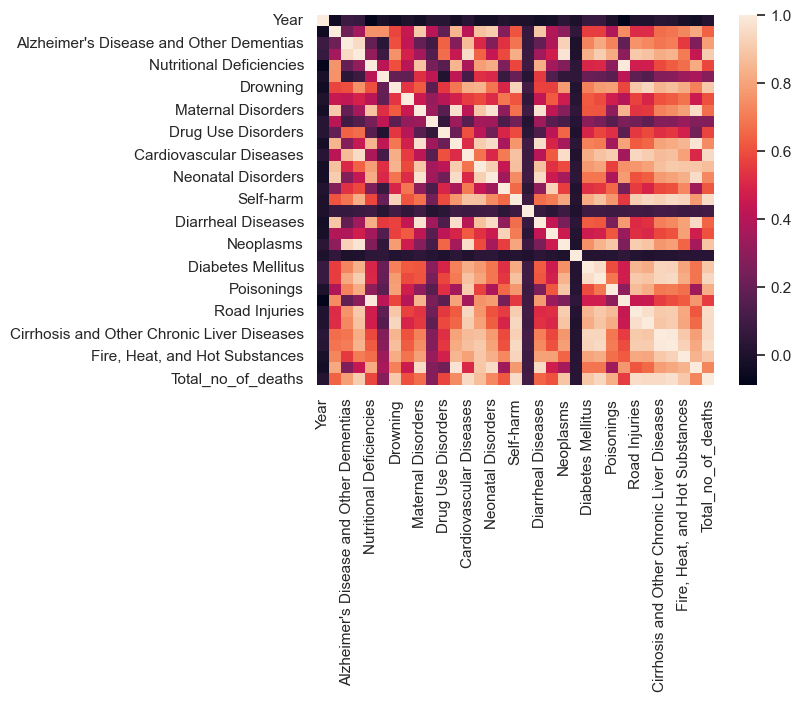

In [69]:
sns.heatmap(dfcor)

<AxesSubplot:>

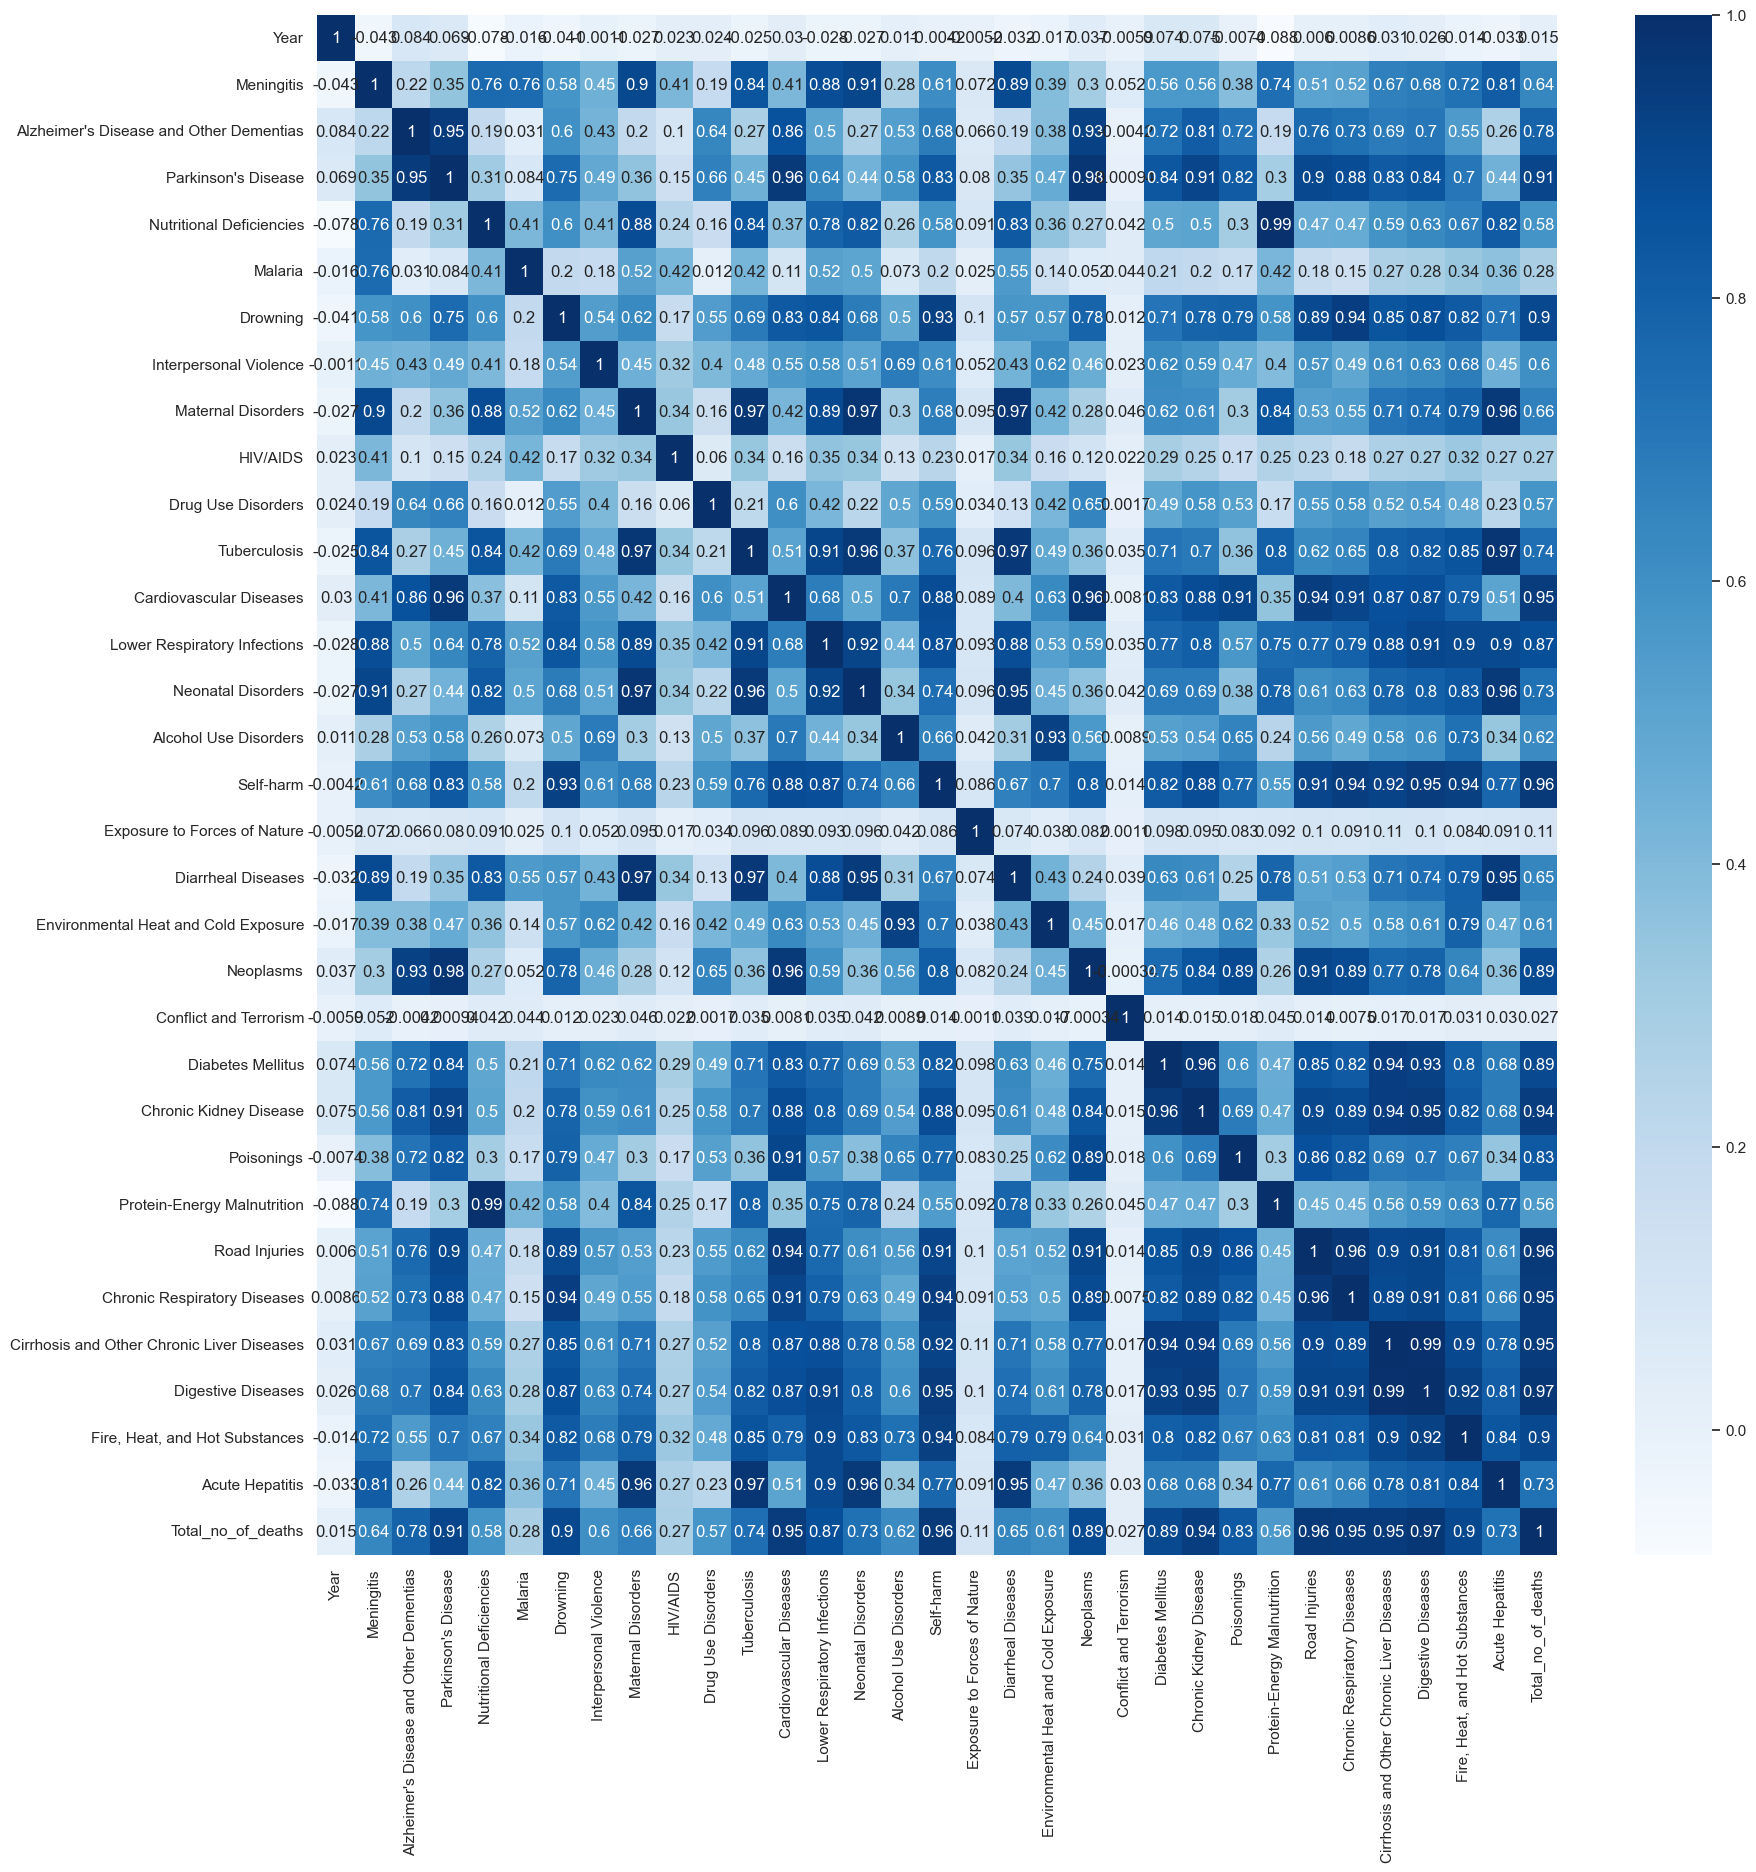

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,cmap='Blues', annot=True)

In [21]:
# Sorting Top 40 total number of deaths 

Top40_Deaths = df.sort_values('Total_no_of_deaths',ascending=False)[:40][['Total_no_of_deaths','Country/Territory','Year']]

Top40_Deaths

,Total_no_of_deaths,Country/Territory,Year
1139,10442561,China,2019
1138,10163943,China,2018
1137,9978653,China,2017
1119,9814213,China,2016
1118,9591222,China,2015
1117,9503904,China,2014
1116,9411928,China,2013
1114,9366974,China,2011
1115,9364587,China,2012
1113,9284664,China,2010


In [23]:
df1 = df.drop('Total_no_of_deaths',axis=1)   

In [24]:
# Top 10 causes of death in China

<AxesSubplot:>

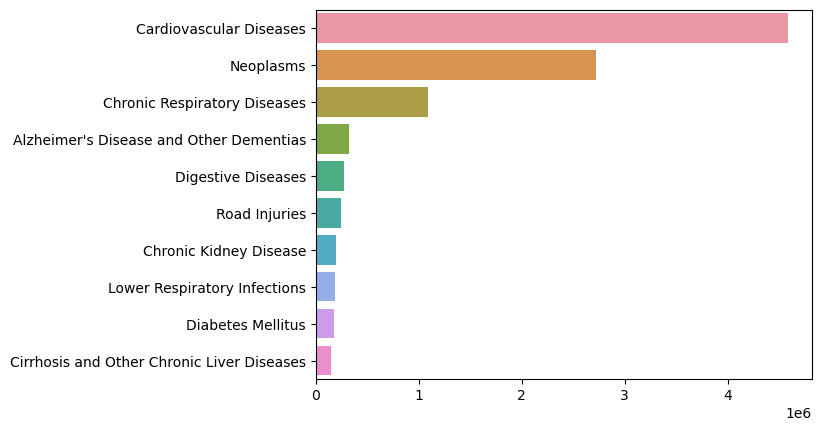

In [25]:
china_2019 = df1[df1['Country/Territory']== "China"].groupby("Year").sum().loc[2019].sort_values(ascending=False)
sns.barplot(x=china_2019.values[:10],y=china_2019.index[:10],orient="h")

In [26]:
# Top 10 causes of death in India

<AxesSubplot:>

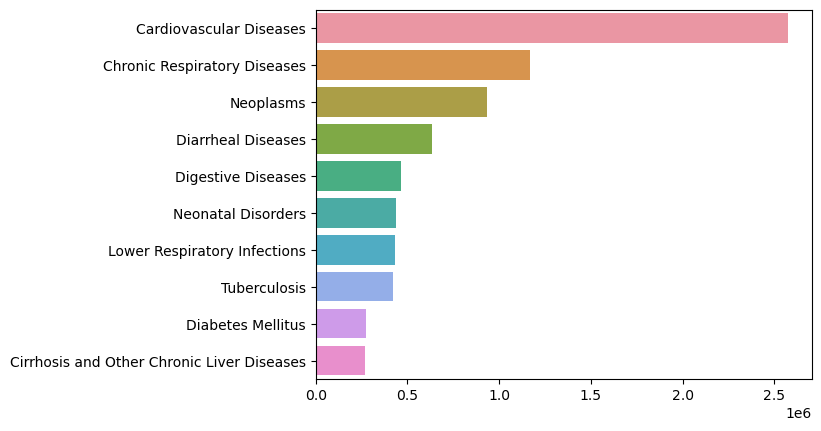

In [28]:
india_2019 = df1[df1['Country/Territory']== "India"].groupby("Year").sum().loc[2019].sort_values(ascending=False)
sns.barplot(x=india_2019.values[:10],y=india_2019.index[:10],orient="h")

In [29]:
# Checking for the disease which suffers most of the countries as a mojor cause of deaths.

In [30]:
cause_by_country = df1.groupby("Code").sum().drop(["Year"],axis=1).idxmax(axis=1)
cause_by_country.value_counts()   

Cardiovascular Diseases         156
HIV/AIDS                         17
Neoplasms                        10
Diarrheal Diseases                7
Malaria                           5
Neonatal Disorders                4
Lower Respiratory Infections      4
Conflict and Terrorism            1
dtype: int64

Text(0, 0.5, '# of Deaths')

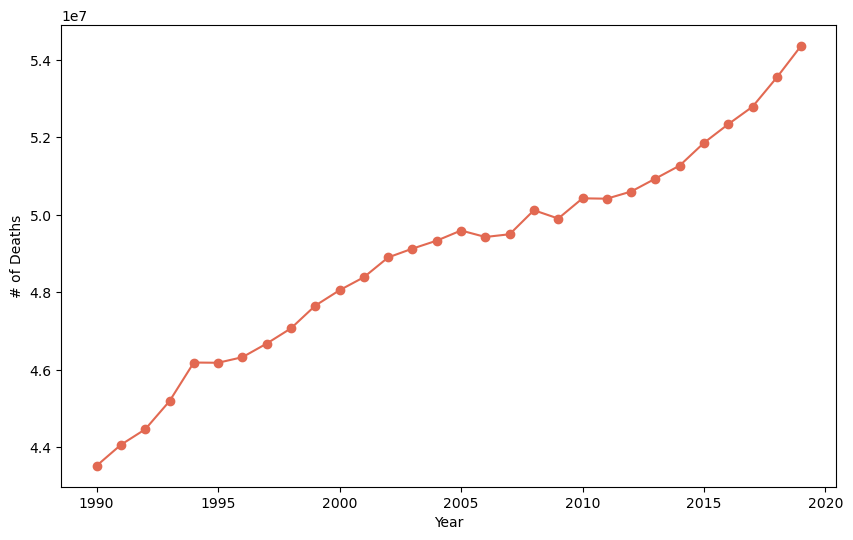

In [31]:
death_by_year = df.groupby("Year").sum()["Total_no_of_deaths"]
fig = plt.figure(figsize=(10,6))
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")

In [32]:
# Checking for Top 10 Countries Suffered From Cardiovascular Deaths

Text(0.5, 0, 'Total Deaths 1990-2019')

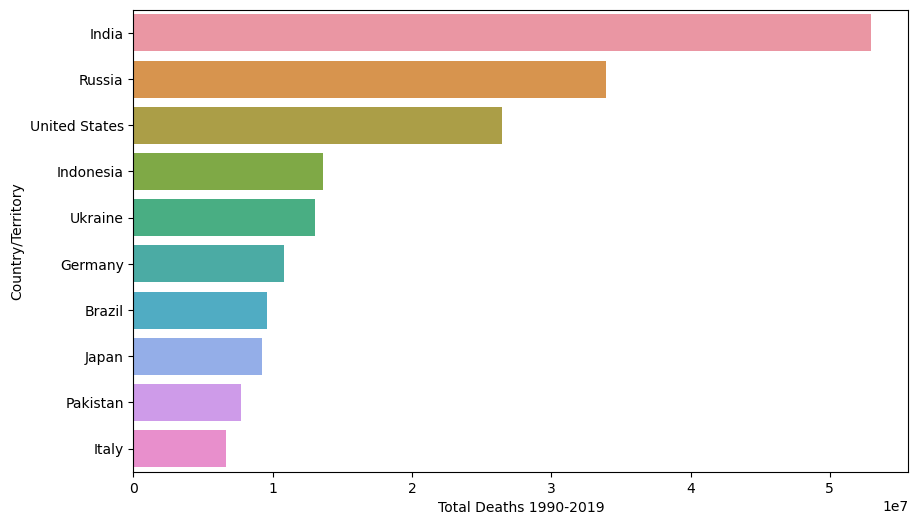

In [33]:
country_cardio = df.groupby("Country/Territory").sum()["Cardiovascular Diseases"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_cardio[1:11].values,y=country_cardio[1:11].index,orient="h") 
plt.xlabel("Total Deaths 1990-2019")

In [35]:
# Checking for Top 10 Countries Suffered From HIV/AIDS 

Text(0.5, 0, 'Total Deaths 1990-2019')

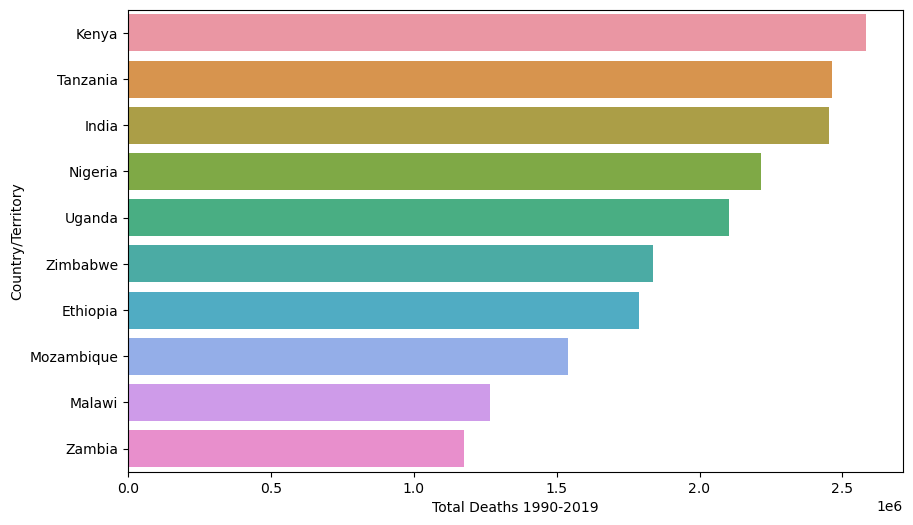

In [36]:
country_AIDS = df.groupby("Country/Territory").sum()["HIV/AIDS"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_AIDS[1:11].values,y=country_AIDS[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

In [37]:
# Checking for Top 10 Countries Suffered From Neoplasmas

Text(0.5, 0, 'Total Deaths 1990-2019')

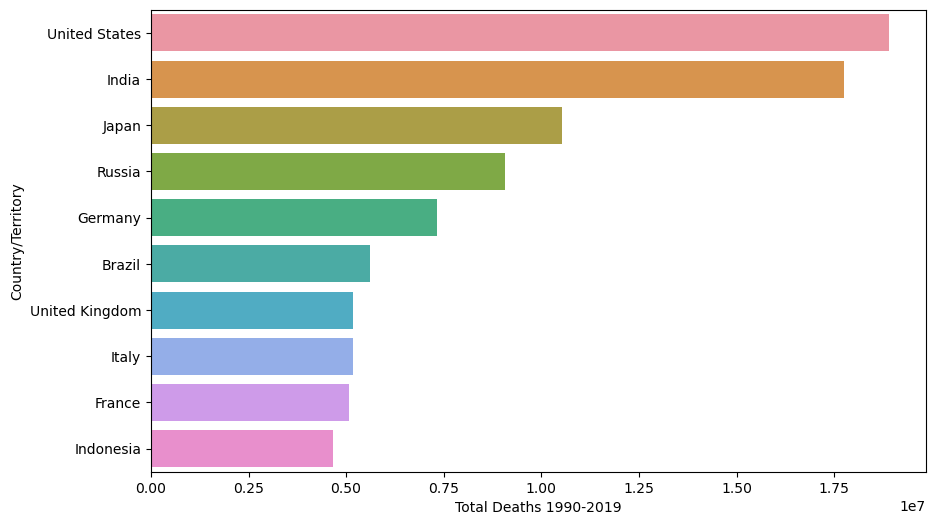

In [38]:
country_neoplasms = df.groupby("Country/Territory").sum()["Neoplasms"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_neoplasms[1:11].values,y=country_neoplasms[1:11].index,orient="h") 
plt.xlabel("Total Deaths 1990-2019")

In [39]:
# Checking for Top 10 Countries Suffered From Diarrheal Diseases

Text(0.5, 0, 'Total Deaths 1990-2019')

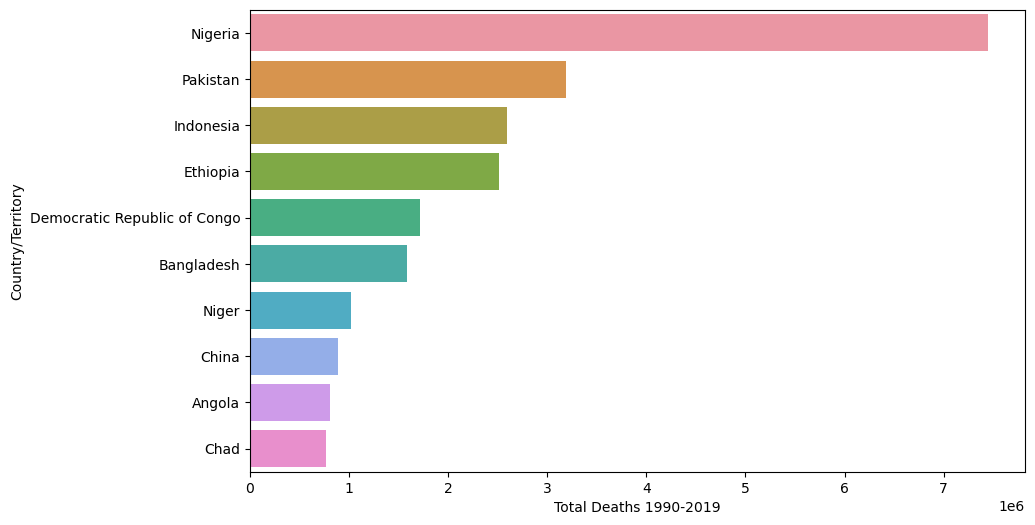

In [40]:
country_diarrheal = df.groupby("Country/Territory").sum()["Diarrheal Diseases"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_diarrheal[1:11].values,y=country_diarrheal[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

In [42]:
# Checking for Top 10 Countries Suffered From Malaria 

Text(0.5, 0, 'Total Deaths 1990-2019')

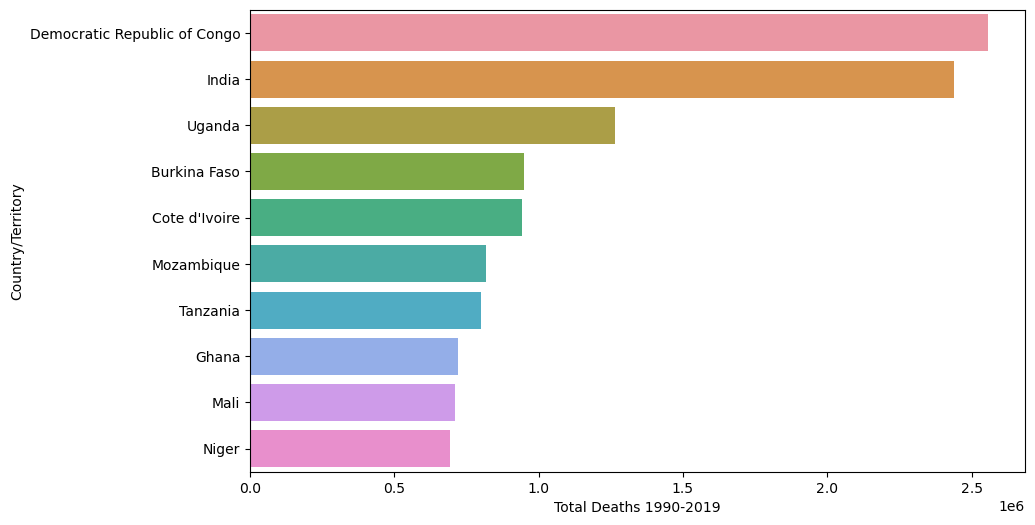

In [43]:
country_malaria = df.groupby("Country/Territory").sum()["Malaria"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_malaria[1:11].values,y=country_malaria[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

Text(0, 0.5, '# of Deaths')

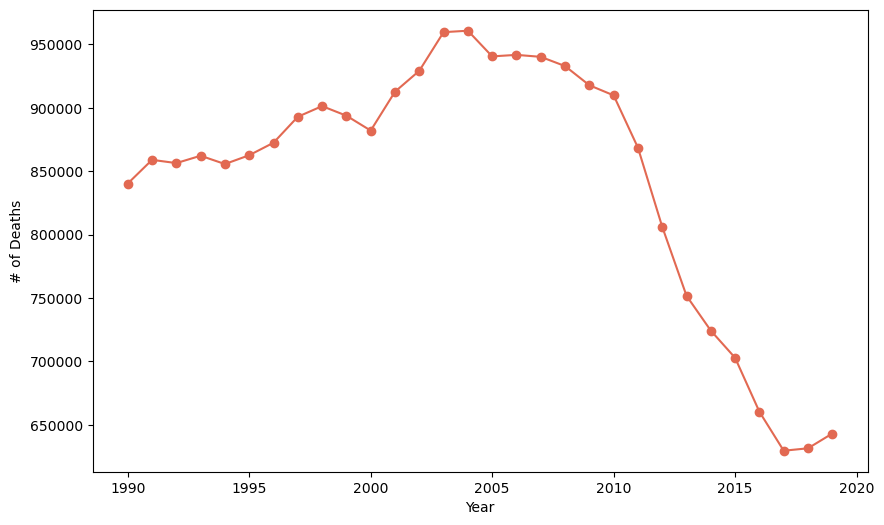

In [44]:
death_by_year = df.groupby("Year").sum()["Malaria"]
fig = plt.figure(figsize=(10,6))
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")

In [45]:
# Checking for Top 10 Countries Affected By Neonatal Disorders

Text(0.5, 0, 'Total Deaths 1990-2019')

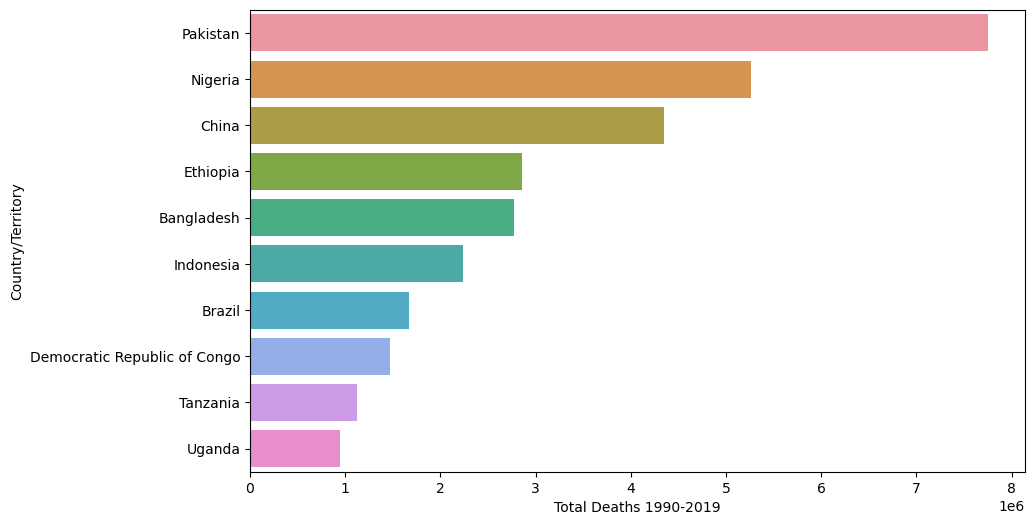

In [46]:
country_neonatal = df.groupby("Country/Territory").sum()["Neonatal Disorders"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_neonatal[1:11].values,y=country_neonatal[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

In [47]:
# Checking for Top 10 Countries Suffered With Lower Respiratory Infections

Text(0.5, 0, 'Total Deaths 1990-2019')

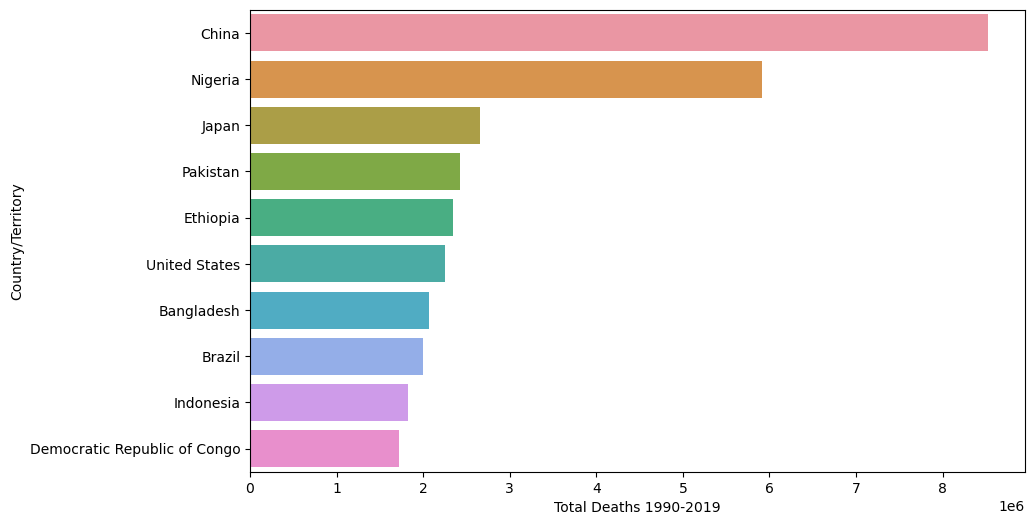

In [48]:
country_LRI = df.groupby("Country/Territory").sum()["Lower Respiratory Infections"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_LRI[1:11].values,y=country_LRI[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

In [49]:
# Checking for Top 10 Countries Suffered With Conflict And Terrorism.

Text(0.5, 0, 'Total Deaths 1990-2019')

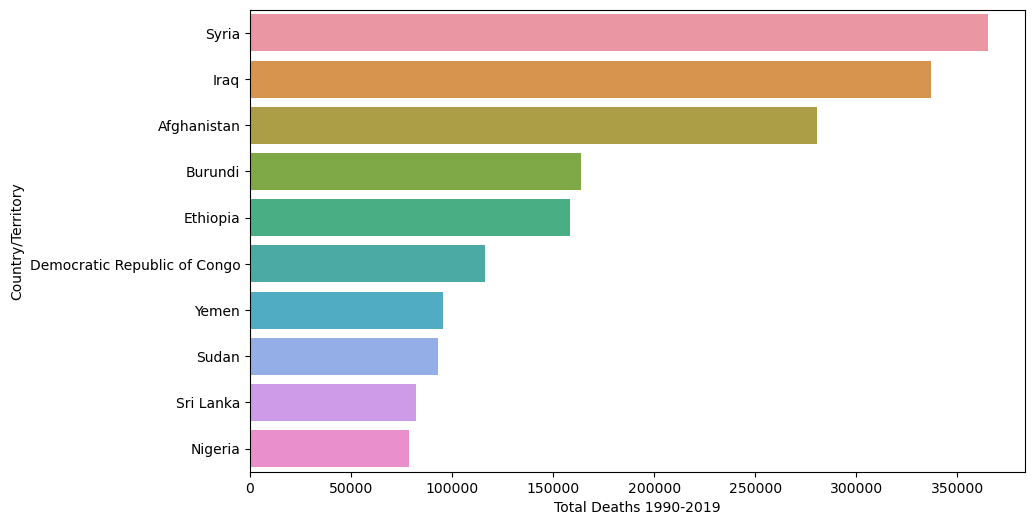

In [50]:
country_terrorism = df.groupby("Country/Territory").sum()["Conflict and Terrorism"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_terrorism[1:11].values,y=country_terrorism[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

Text(0, 0.5, 'Death by Terrorism')

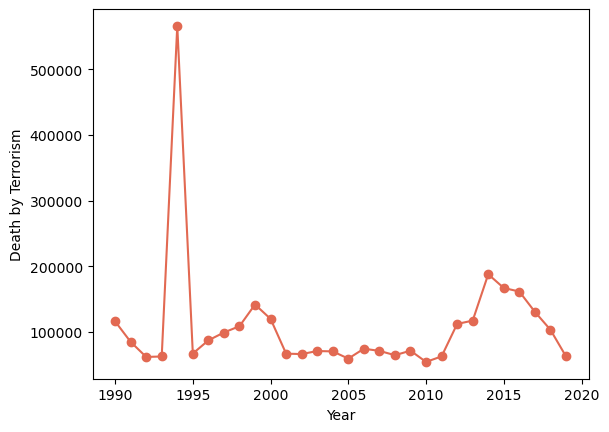

In [51]:
df.groupby("Year").sum()["Conflict and Terrorism"].plot(marker="o")
plt.ylabel("Death by Terrorism")

Text(0.5, 0, 'Total Deaths 1990-2019')

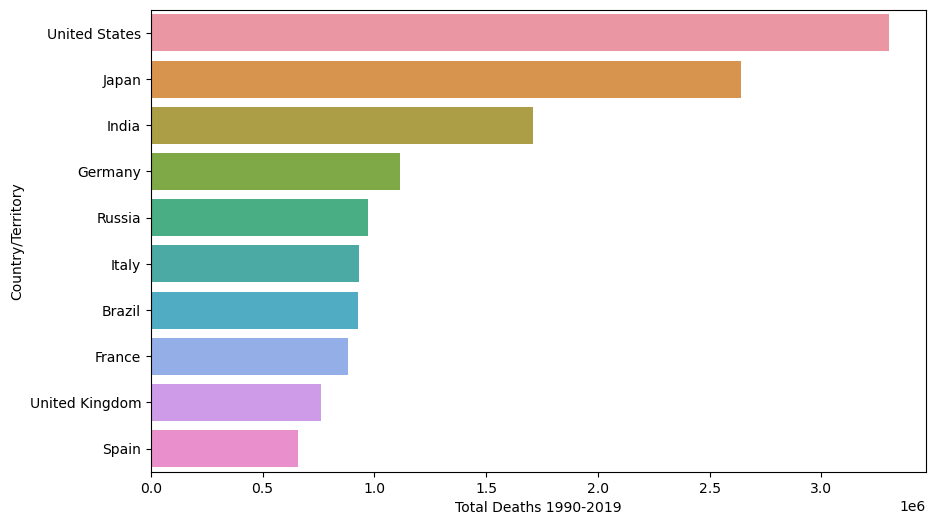

In [53]:
country_dementia = df.groupby("Country/Territory").sum()["Alzheimer's Disease and Other Dementias"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_dementia[1:11].values,y=country_dementia[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

Text(0.5, 0, 'Total Deaths 1990-2019')

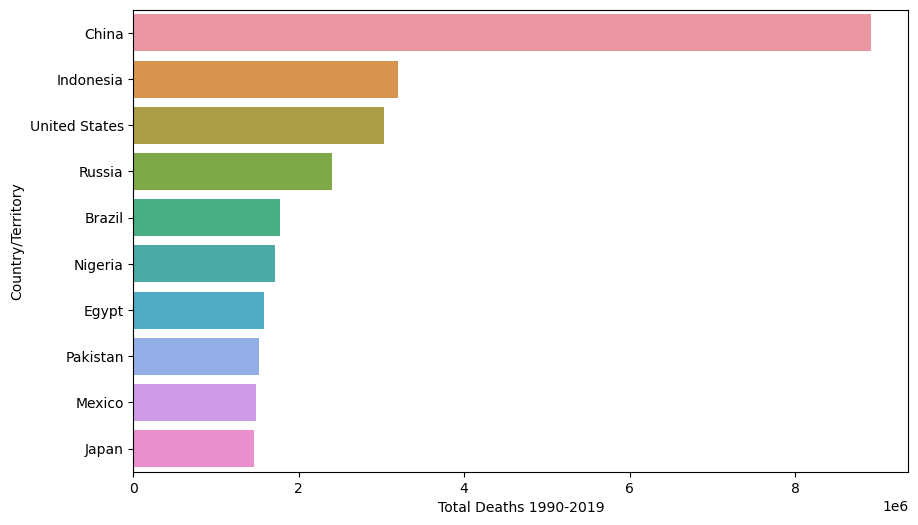

In [54]:
country_digestive = df.groupby("Country/Territory").sum()["Digestive Diseases"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_digestive[1:11].values,y=country_digestive[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

In [55]:
# Checking for Top 10 Countries Suffered With Tuberculosis 

Text(0.5, 0, 'Total Deaths 1990-2019')

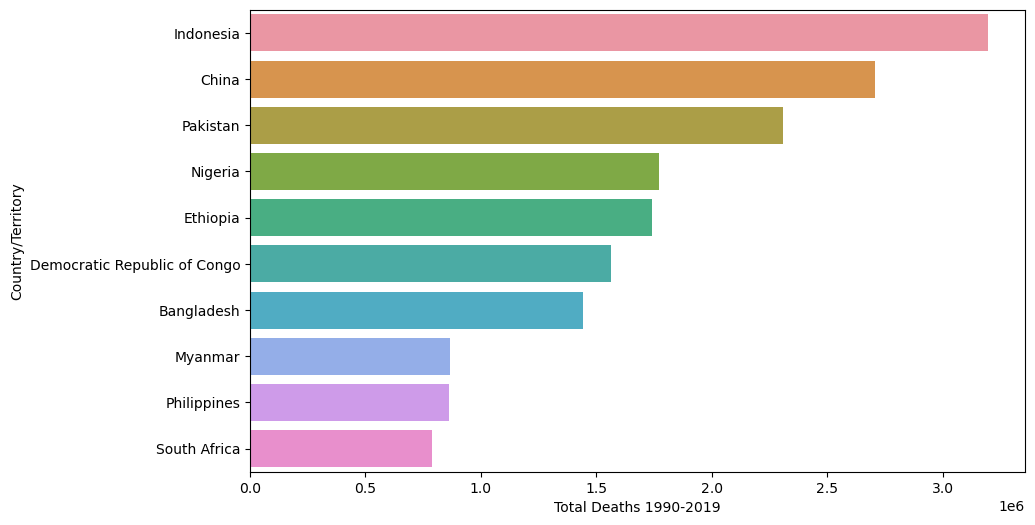

In [56]:
country_TB = df.groupby("Country/Territory").sum()["Tuberculosis"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_TB[1:11].values,y=country_TB[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

Text(0.5, 0, 'Total Deaths 1990-2019')

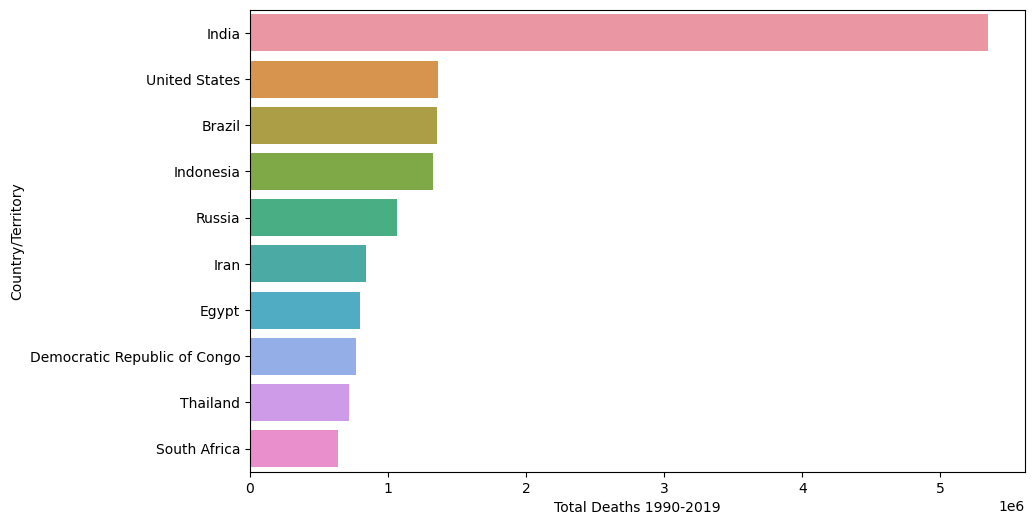

In [57]:
country_road = df.groupby("Country/Territory").sum()["Road Injuries"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_road[1:11].values,y=country_road[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

<AxesSubplot:xlabel='Self-harm', ylabel='Road Injuries'>

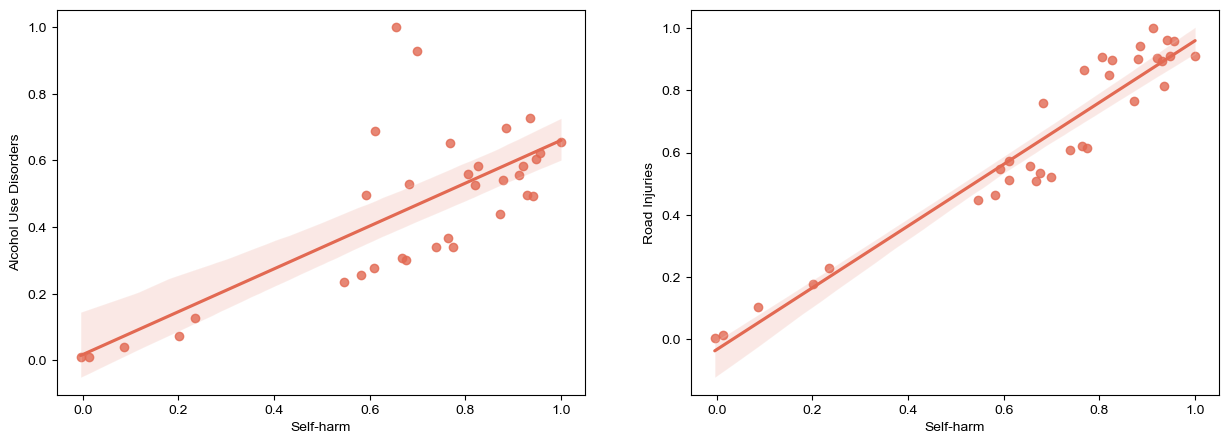

In [65]:
fig, axes = plt.subplots(figsize=(15, 5),sharey=False,ncols=2)
sns.set_theme(style="darkgrid")
sns.regplot(data = dfcor, x='Self-harm', y='Alcohol Use Disorders',ax = axes[0])
sns.regplot(data = dfcor, x='Self-harm', y='Road Injuries',ax = axes[1])

Text(0.5, 0, 'Total Deaths 1990-2019')

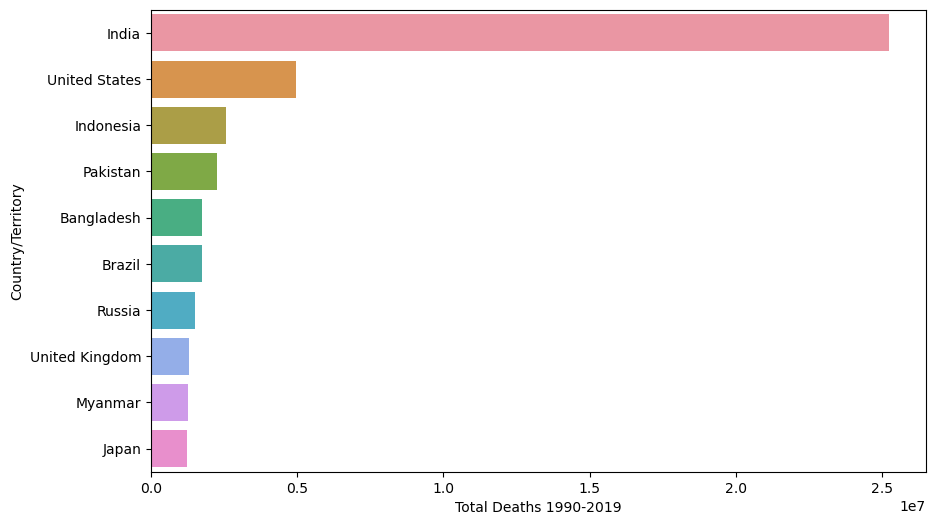

In [60]:
country_chronic = df.groupby("Country/Territory").sum()["Chronic Respiratory Diseases"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_chronic[1:11].values,y=country_chronic[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")